Fake News Detection using NLP

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")

print("Path to dataset files:", path)


100%|██████████| 41.0M/41.0M [00:00<00:00, 51.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/clmentbisaillon/fake-and-real-news-dataset/versions/1


Using Colab cache for faster access to the 'fake-and-real-news-dataset' dataset.
Accuracy: 0.9821826280623608
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4710
           1       0.98      0.98      0.98      4270

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



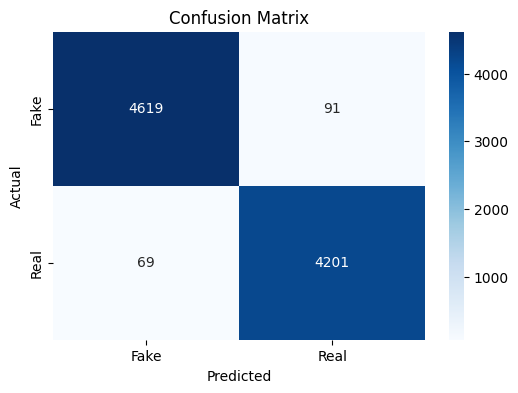

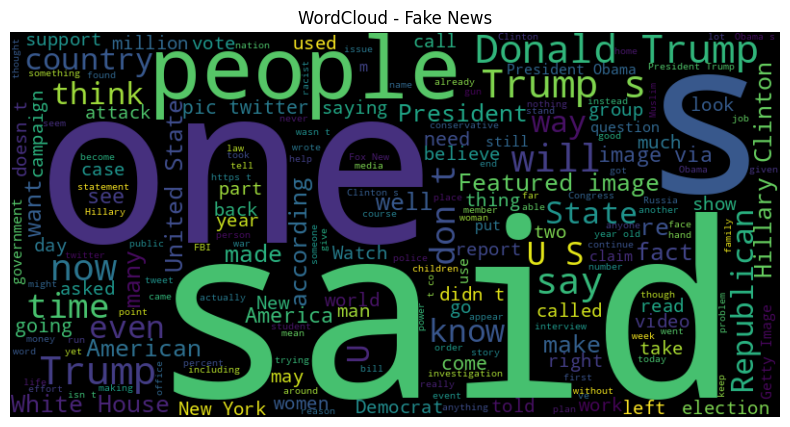

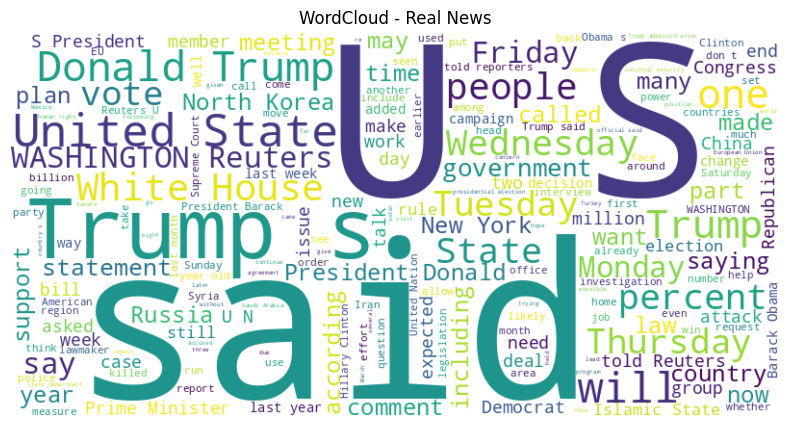

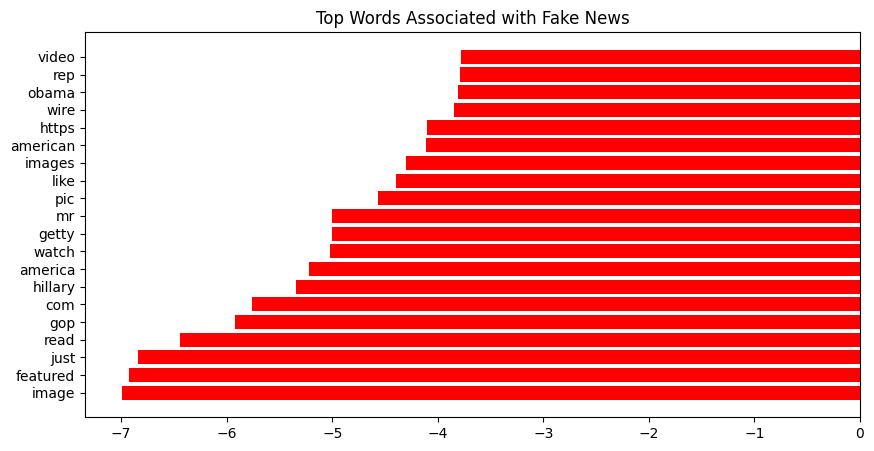

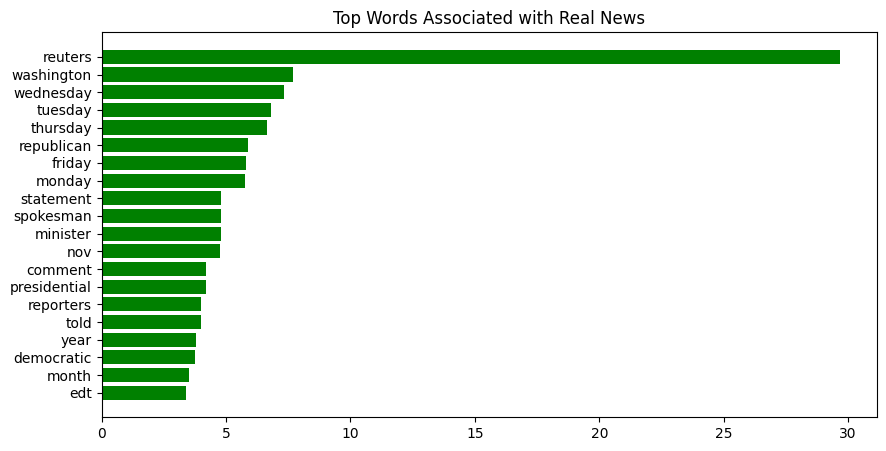

Fake News (Confidence: 79.52%)


In [9]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---------- Download Dataset ----------
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")
fake_path = os.path.join(path, "Fake.csv")
real_path = os.path.join(path, "True.csv")

fake = pd.read_csv(fake_path)
real = pd.read_csv(real_path)

fake['label'] = 0
real['label'] = 1

data = pd.concat([fake, real]).sample(frac=1, random_state=42).reset_index(drop=True)

X = data['text']
y = data['label']

# ---------- TF-IDF Vectorization ----------
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# ---------- Logistic Regression ----------
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ---------- Confusion Matrix ----------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# ---------- WordClouds ----------
fake_text = " ".join(fake['text'])
real_text = " ".join(real['text'])

plt.figure(figsize=(10,5))
wc_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_text)
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Fake News')
plt.savefig("fake_wordcloud.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,5))
wc_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.imshow(wc_real, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Real News')
plt.savefig("real_wordcloud.png", dpi=300, bbox_inches='tight')
plt.show()

# ---------- Top Words by Coefficient ----------
feature_array = np.array(vectorizer.get_feature_names_out())
tfidf_sorting = np.argsort(model.coef_[0])

top_fake = feature_array[tfidf_sorting[:20]]
top_fake_values = model.coef_[0][tfidf_sorting[:20]]

top_real = feature_array[tfidf_sorting[-20:]]
top_real_values = model.coef_[0][tfidf_sorting[-20:]]

plt.figure(figsize=(10,5))
plt.barh(top_fake, top_fake_values, color='red')
plt.title('Top Words Associated with Fake News')
plt.savefig("top_fake_words.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,5))
plt.barh(top_real, top_real_values, color='green')
plt.title('Top Words Associated with Real News')
plt.savefig("top_real_words.png", dpi=300, bbox_inches='tight')
plt.show()

# ---------- Prediction Function ----------
def predict_news(text):
    vec = vectorizer.transform([text])
    pred = model.predict(vec)[0]
    prob = model.predict_proba(vec)[0][pred]
    return f"{'Real News' if pred==1 else 'Fake News'} (Confidence: {prob*100:.2f}%)"

sample = "The government announced new reforms in education today."
print(predict_news(sample))
